#### 2.1) Import libraries:


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

#### 2.2) Import data (csv as pandas dataframe) 

In [3]:
df=pd.read_csv("data/raw.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### 2.3) data information:

   1. Gender: sex of student -> (Male / Female)    
   2. race_ethnicity: ethnicity of students -> (Group A,B,C,D,E)    
   3. Parental_level_of_education:Parents final education -> (bachelor's degree, some college,
      master's degree, associate's degree, high school)    
   4. Lunch: having lunch before test -> (standard or free/reduced)       
   5. test preparation course: before test -> (complete/not complete)    
   6. math score    
   7. reading score    
   8. writing score

#### 3) Data Checks to Perform:

1. check missing values    
2. check duplicates    
3. check data types    
4. check the number of unique values of each column    
5. check statistics of dataset    
6. check various categories present in the different categorical problem

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated(keep=False)]
# to see particular position of duplicate data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insight:->                                                                                  
    => from the above description of numerical data, all means are very close to each    
       other between  66 and 69; all S.D. are also very close between 14.6 and 15.19.     
    => while there is a minimum score 0 for math, for writing minimum is much higher = 10    
       and for reading much higher =17   


In [12]:
print(f"categories in 'gender' variable: {df['gender'].unique()}")
print(f"categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()}")
print(f"categories in 'parental_level_of_education' variable: {df['parental_level_of_education'].unique()} ")
print(f"categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"categories in 'test_preparation_course' variable: {df['test_preparation_course'].unique()} ")


categories in 'gender' variable: ['female' 'male']
categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'test_preparation_course' variable: ['none' 'completed'] 


In [13]:
# print(f"categories in 'gender' variable: {df["gender"].unique()}")
# under f-string any variable with double inverted comma gives an error. 

### define numerical and categorical columns:

In [14]:
num_features=[i for i in df.columns if df[i].dtype!='O']
cat_features=[i for i in df.columns if df[i].dtype=='O']

print(f"we have {len(num_features)} numerical features:\n{num_features}")
print(f"\nwe have {len(cat_features)} categorical features:\n{cat_features}")


we have 3 numerical features:
['math_score', 'reading_score', 'writing_score']

we have 5 categorical features:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### creating new columns for "total_score" and "average":


In [6]:
df["total_score"]=df['math_score']+df['reading_score']+df['writing_score']

df["average"]=df["total_score"]/3

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


is anyone got full marks in a particular subject? :

In [17]:
math_full=df[df["math_score"]==100]['math_score'].count()
reading_full=df[df["reading_score"]==100]['average'].count()
writing_full=df[df["writing_score"]==100]['math_score'].count()

In [18]:
print(f"number of students with full marks in maths: {math_full}")
print(f"number of students with full marks in reading: {reading_full}")
print(f"number of students with full marks in writing: {writing_full}")

number of students with full marks in maths: 7
number of students with full marks in reading: 17
number of students with full marks in writing: 14


were students got marks <=20 in a particular subject? :

In [19]:
math_less=df[df["math_score"]<=20]["math_score"].count()
reading_less=df[df["reading_score"]<=20]["math_score"].count()
writing_less=df[df["writing_score"]<=20]["average"].count()

In [20]:
print(f"number of students with less than 20 marks in maths: {math_less}")
print(f"number of students with less than 20 marks in reading: {reading_less}")
print(f"number of students with less than 20 marks in writing: {writing_less}")

number of students with less than 20 marks in maths: 4
number of students with less than 20 marks in reading: 1
number of students with less than 20 marks in writing: 3


INSIGHTS=>      
    -> from the above values we get students have performed the worst in maths.     
    -> best perforance is in reading section.

### 4) Exploring Data (Visualization)

=> 4.1) Histogram and KDE

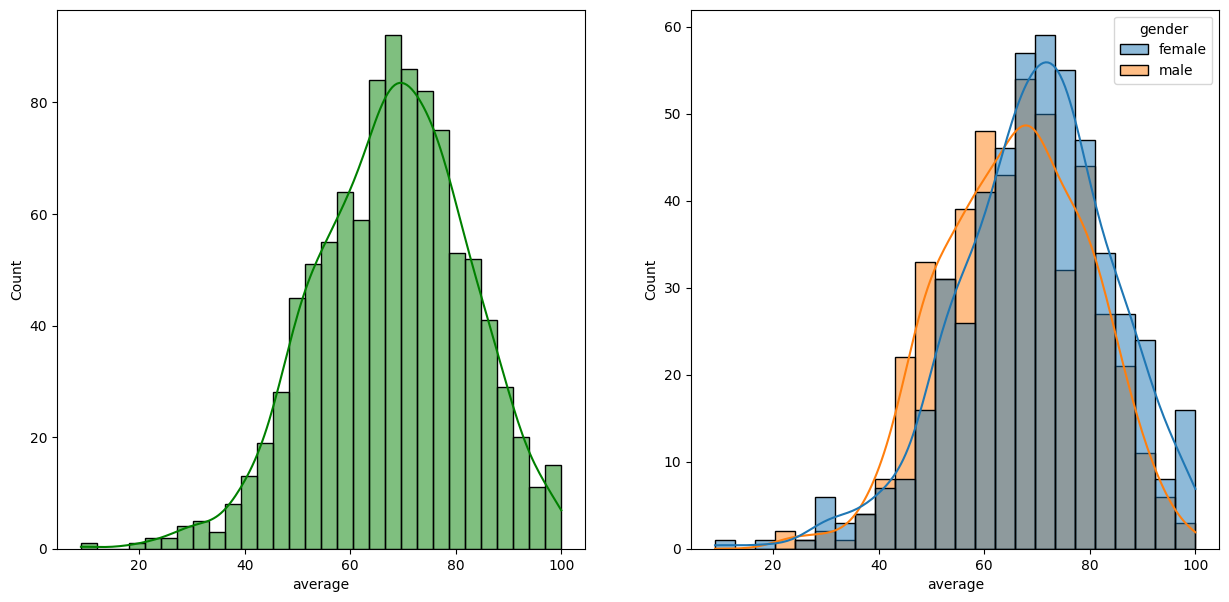

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True, hue='gender')

plt.show()

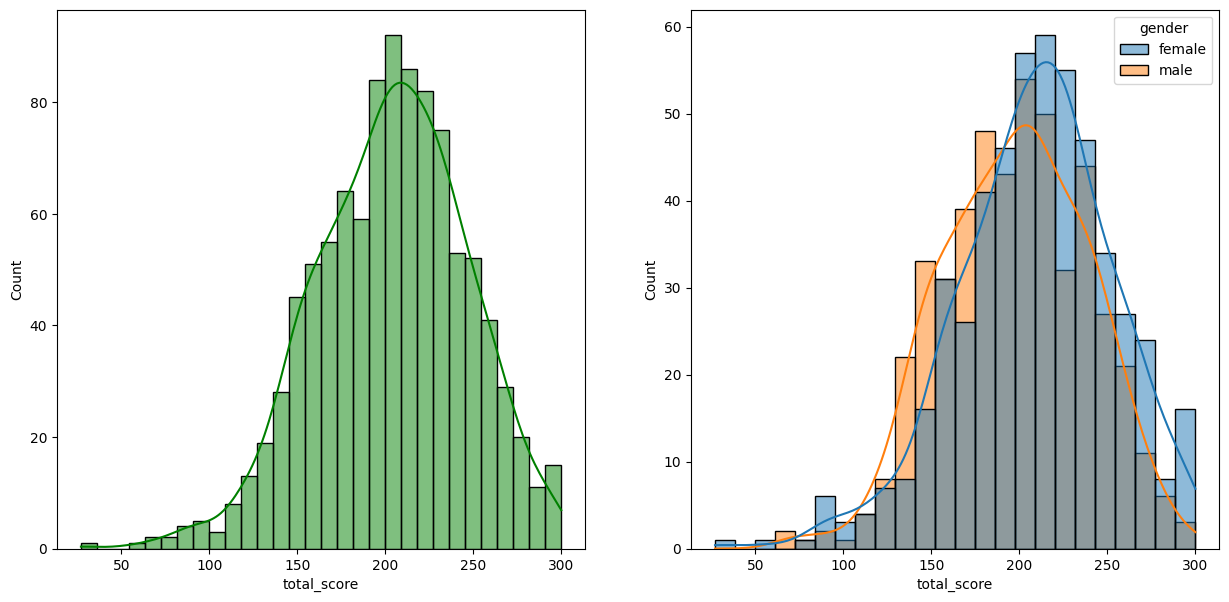

In [28]:
fig, axs= plt.subplots(1,2,figsize=(15,7))

plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color="g")

plt.subplot(122)
sns.histplot(data=df,x="total_score", kde=True, hue="gender")
plt.show()

=> INSIGHT:    
        -> Female students tend to perform well than male student.

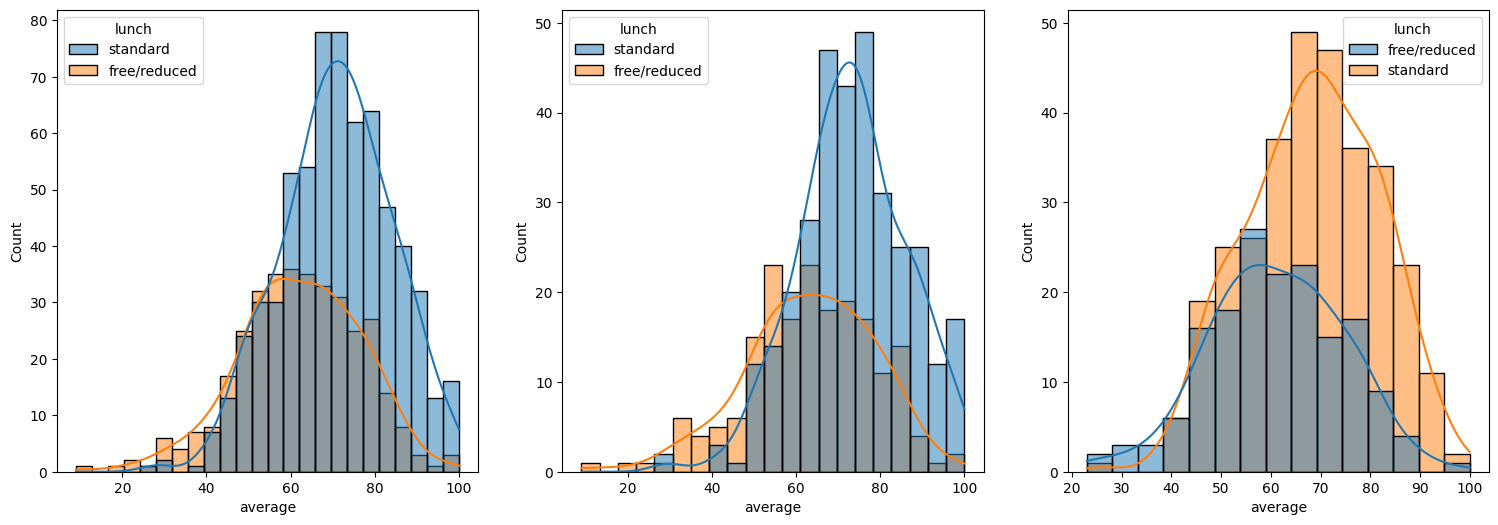

In [41]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(141)
sns.histplot(data=df,x="average", kde=True, hue="lunch")

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="average",kde=True, hue='lunch')

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

plt.show()

=> INSIGHT:     
        -> Standard lunch helps perform well in exam.     
        -> Standard lunch helps perfor well in exam be it ale or female.

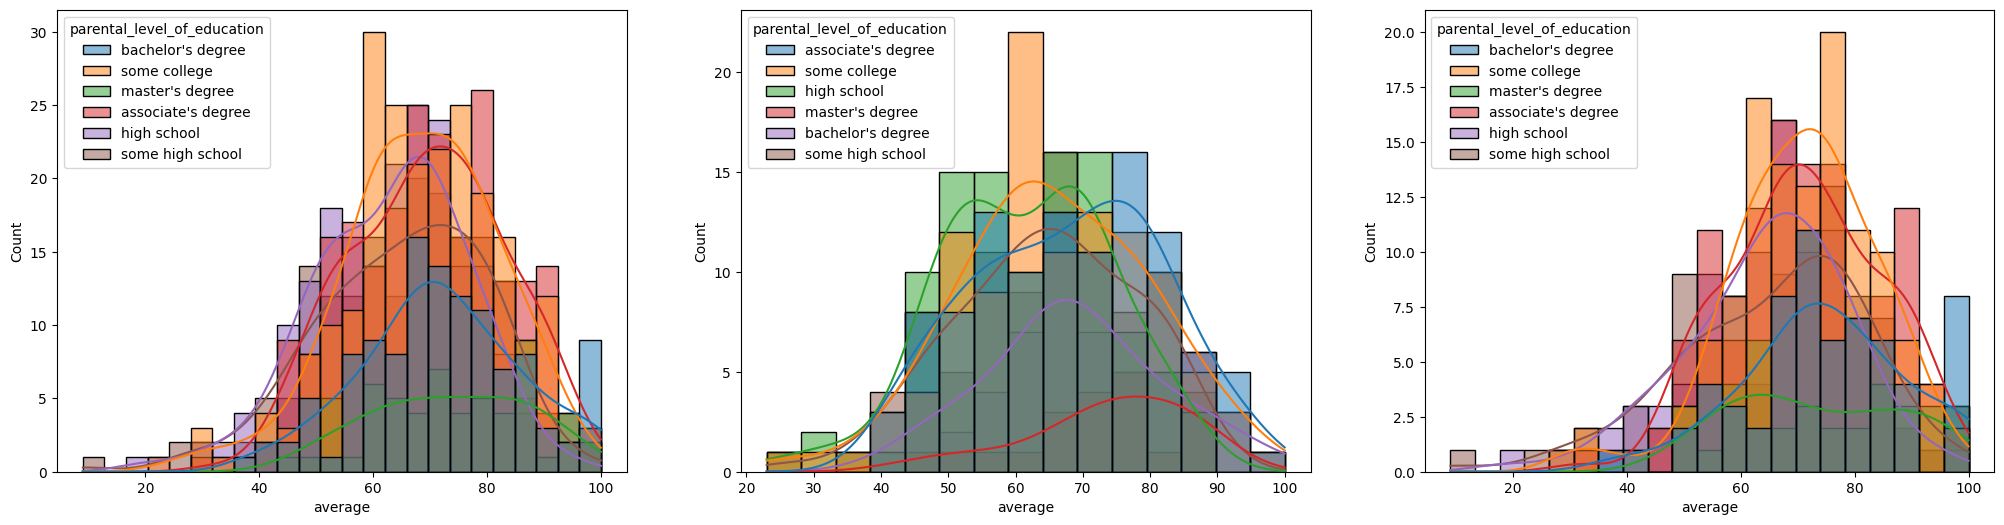

In [63]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue="parental_level_of_education")

plt.subplot(132)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue="parental_level_of_education")

plt.subplot(133)
sns.histplot(data=df[df.gender=="female"],x='average',kde=True, hue='parental_level_of_education')

plt.show()

INSIGHT:    
    -> In general, parent's education don't help student to perform well in exam.    
    -> 2nd plot shows that, male students whose parents education is of associate's degree or
       master's degree tend to perform well in exam.    
    -> 3rd plot we can see there is no effect of parents education on female students.

<Axes: xlabel='average', ylabel='Count'>

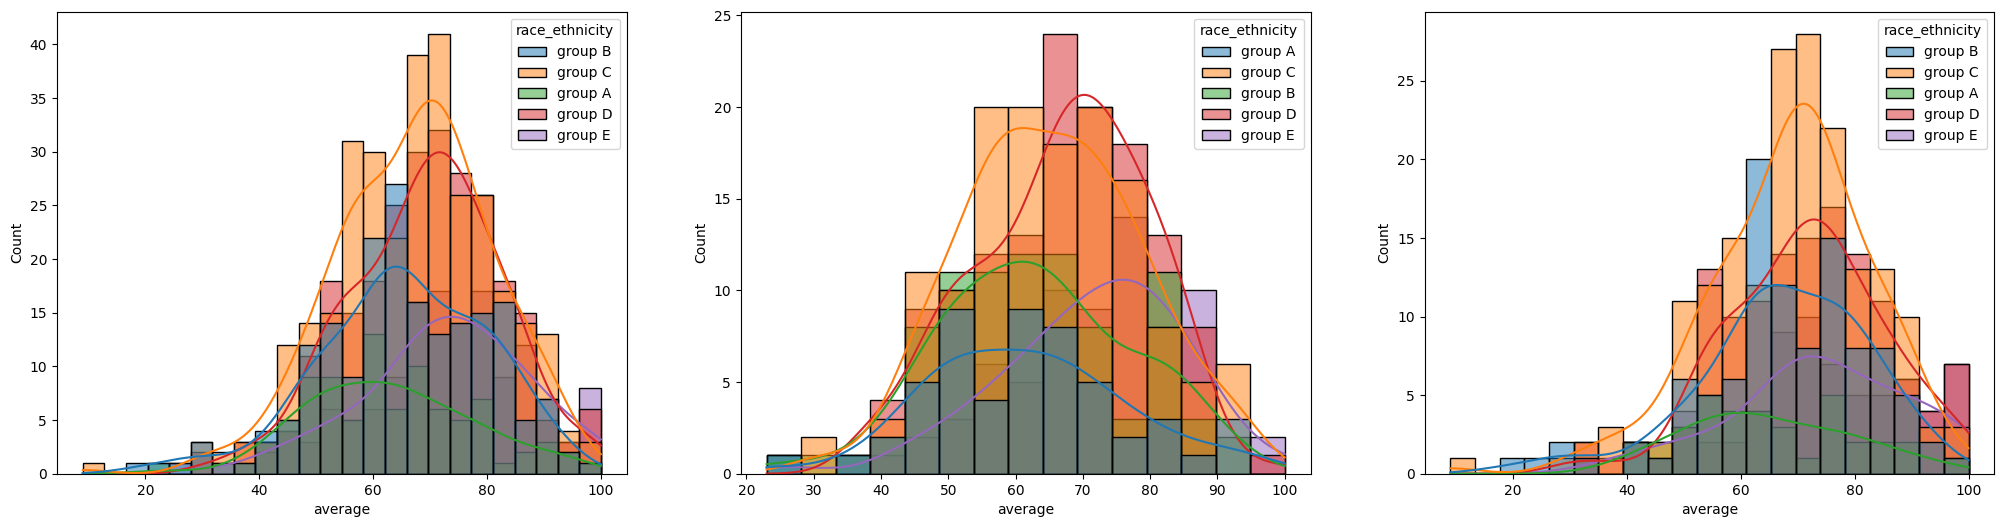

In [70]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue="race_ethnicity")

plt.subplot(132)
sns.histplot(data=df[df.gender=="male"],x='average',kde=True, hue='race_ethnicity')

plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue="race_ethnicity")

INSIGHTS:    
    -> students from group A and B tends to perform poorely in exam.    
    -> students from group A and B tends to perform poorely in exam irrespective of           
       wheather they are male or female.

##### **4.2) Maximum number of score of students in all three subject:** 

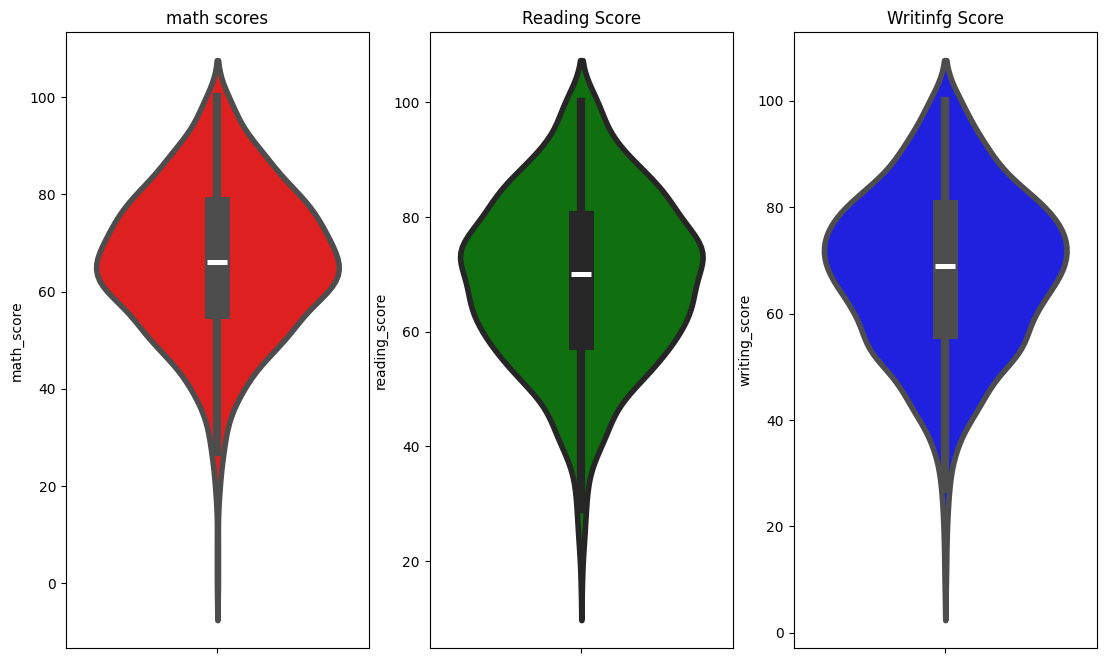

In [92]:
plt.figure(figsize=(18,8))

plt.subplot(1,4,1)
plt.title("math scores")
sns.violinplot(y="math_score",data=df, color='r', linewidth=4)

plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(data=df, y="reading_score", color='g', linewidth=4)

plt.subplot(1,4,3)
plt.title("Writinfg Score")
sns.violinplot(data=df, y="writing_score", color='b', linewidth=4)

plt.show()

INSIGHT:    
        => From the above three plots it is clearly visible that most of the students score in between 60-80 in maths whereas in reading and writing most of them score fro 50-80. (density) 

##### **4.3) Multivariate analysis using pieplot:**

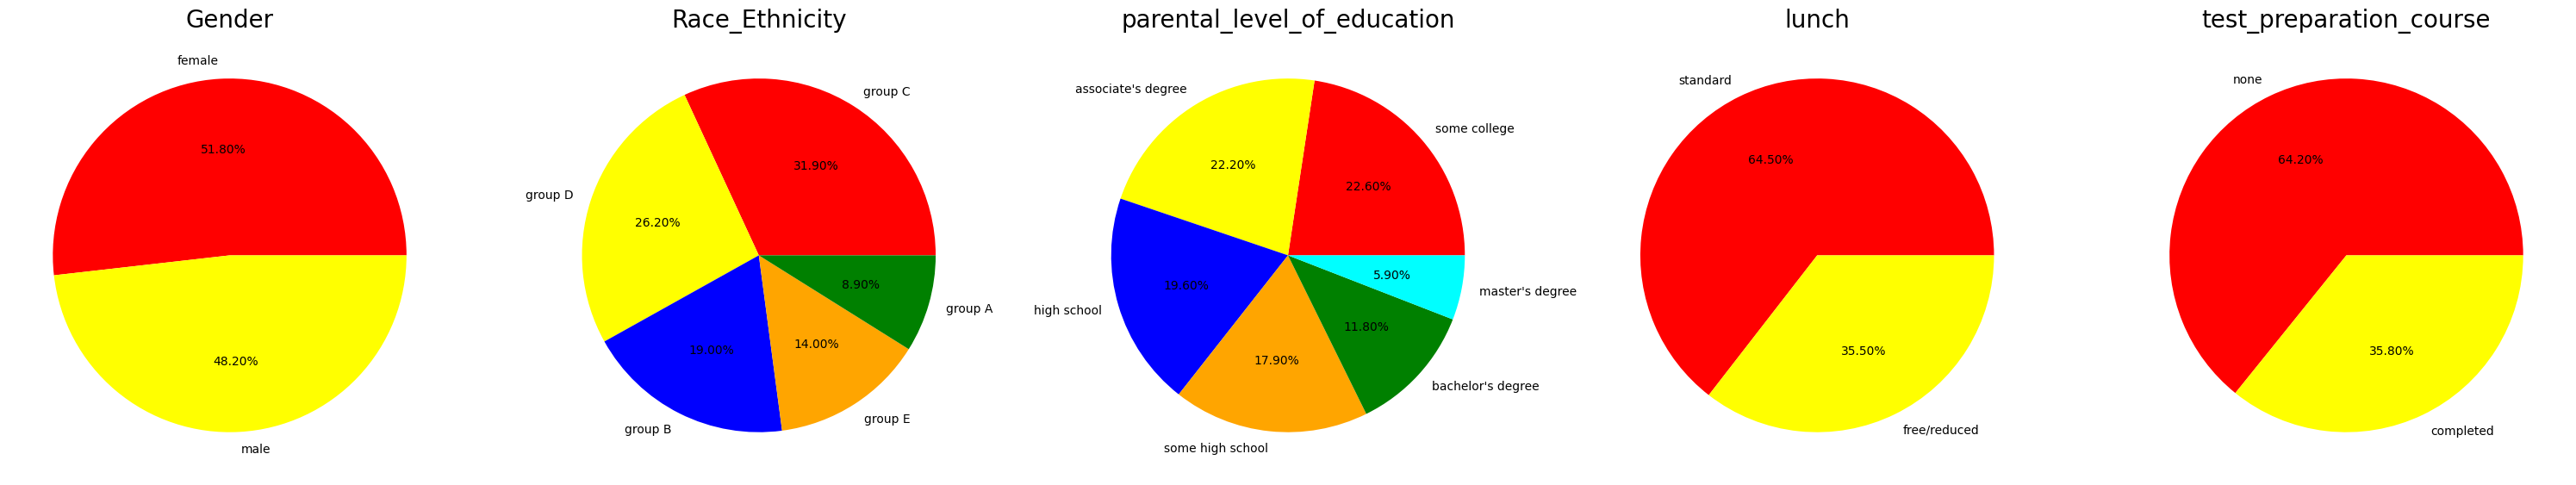

In [52]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels=df['gender'].value_counts().index
color=['red','yellow']
plt.pie(size,labels=labels, colors=color, autopct='%2.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels=df['race_ethnicity'].value_counts().index
color=['red','yellow','blue','orange','green']
plt.pie(size,labels=labels,colors=color,autopct='%2.2f%%')
plt.title("Race_Ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels=df['parental_level_of_education'].value_counts().index
color=['red','yellow','blue','orange','green','cyan']
plt.pie(size,labels=labels,colors=color,autopct="%2.2f%%")
plt.title('parental_level_of_education',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels=df['lunch'].value_counts().index
colors=['r','yellow']
plt.pie(size, labels=labels ,colors=colors ,autopct='%2.2f%%')
plt.title("lunch",fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
label=df['test_preparation_course'].value_counts().index
color=['red','yellow']
plt.pie(size,labels=label ,colors=color, autopct='%2.2f%%')
plt.title("test_preparation_course",fontsize=20)
plt.axis("off")

plt.tight_layout()
plt.grid()
plt.show()

INSIGHTS=>    
    1) number of male and female students is almost equal.    
    2) number of students are greatest in group C.    
    3) number of students whose parental education is "some degree" is greater followed closely by associates degree.    
    4) number of students who have standard lunch are greater.     
    5) number of students who have not enrolled in any test preparation course is greater. 

#### **4.4) Feature wise Visualization**

#### 1) Gender Column:    
        => How is Distribution of Gender?
        => is gender has any impact on students perforance?

##### **Univariate Analsis (How is distribution of gender?):**

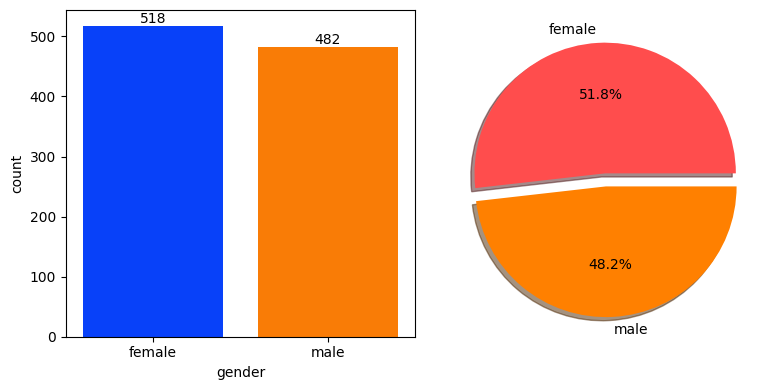

In [45]:
f,ax=plt.subplots(1,2,figsize=(8,4))
sns.countplot(x=df['gender'],palette='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)

plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.tight_layout()
plt.show()    

INSIGHTS:
    => Gender has balanced data with female students are 518(51.8%) and and male            students     are 482(48.2%)

#### **BIVARIATE ANALYSIS (is gender has any impact on student's performance?)**

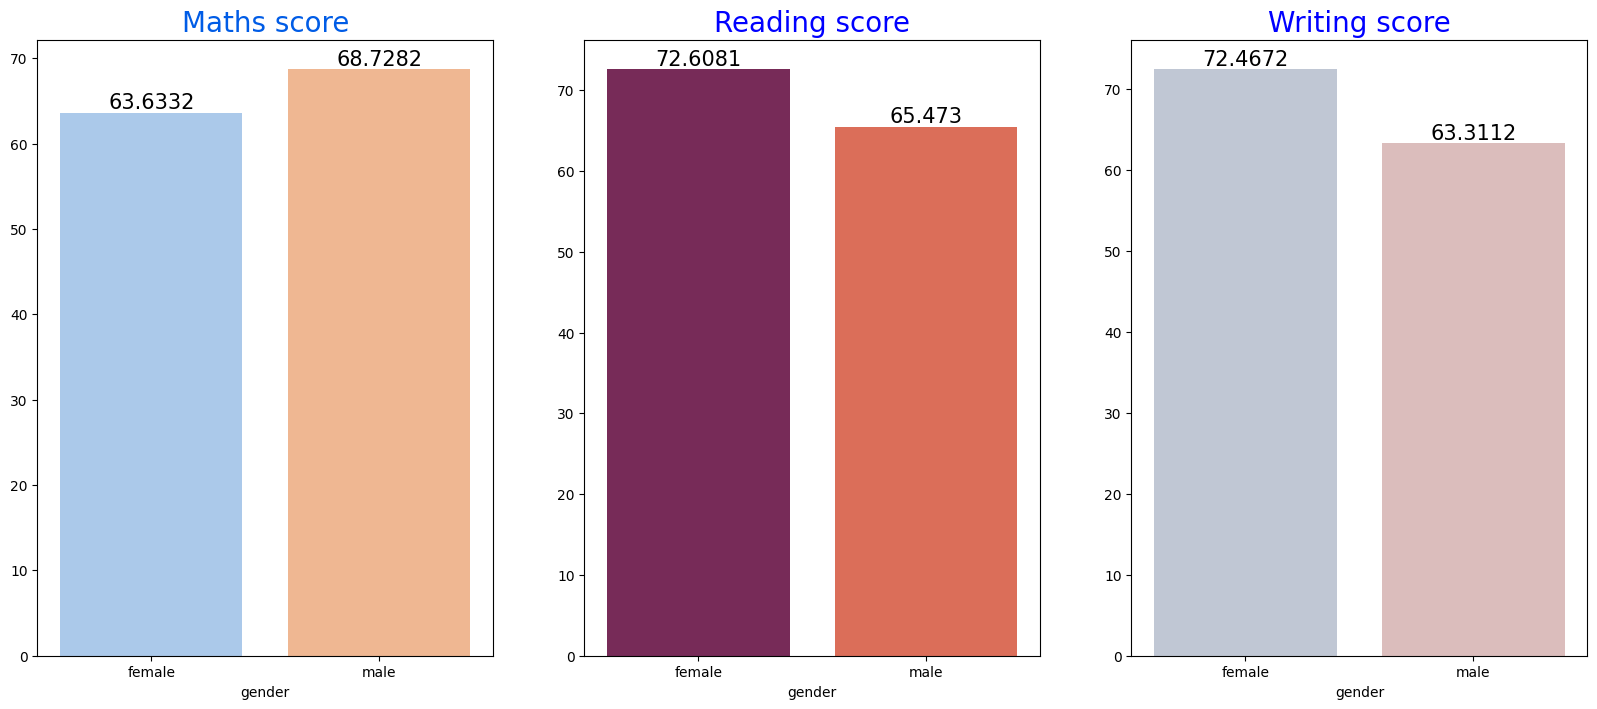

In [115]:
group_data=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data['math_score'].mean().index,
            y=group_data['math_score'].mean().values,
            palette='pastel',
            ax=ax[0])
ax[0].set_title('Maths score',color='#005ce6',size=20)      
for i in ax[0].containers:
    ax[0].bar_label(i, color='black', size=15)

sns.barplot(x=group_data['reading_score'].mean().index,
            y=group_data['reading_score'].mean().values,
            palette='rocket',
            ax=ax[1])
ax[1].set_title('Reading score',color='b', size=20)
for i in ax[1].containers:
    ax[1].bar_label(i,color='black',size=15)


sns.barplot(x=group_data['writing_score'].mean().index,
            y=group_data['writing_score'].mean().values,
            palette='vlag',
            ax=ax[2])
ax[2].set_title('Writing score',color='b',size=20)
for i in ax[2].containers:
    ax[2].bar_label(i,color='black',size=15)



INSIGHTS:    
    => Male have scored higher in maths.    
    => Female have scored higher in all subjects except maths.

##### **2) race_ethnicity:**

=> how is group wise distribution?    
=> is race_ethnicity has any impact on student's performance?

#### *Univariate Analysis (how is group wise distribution?)*

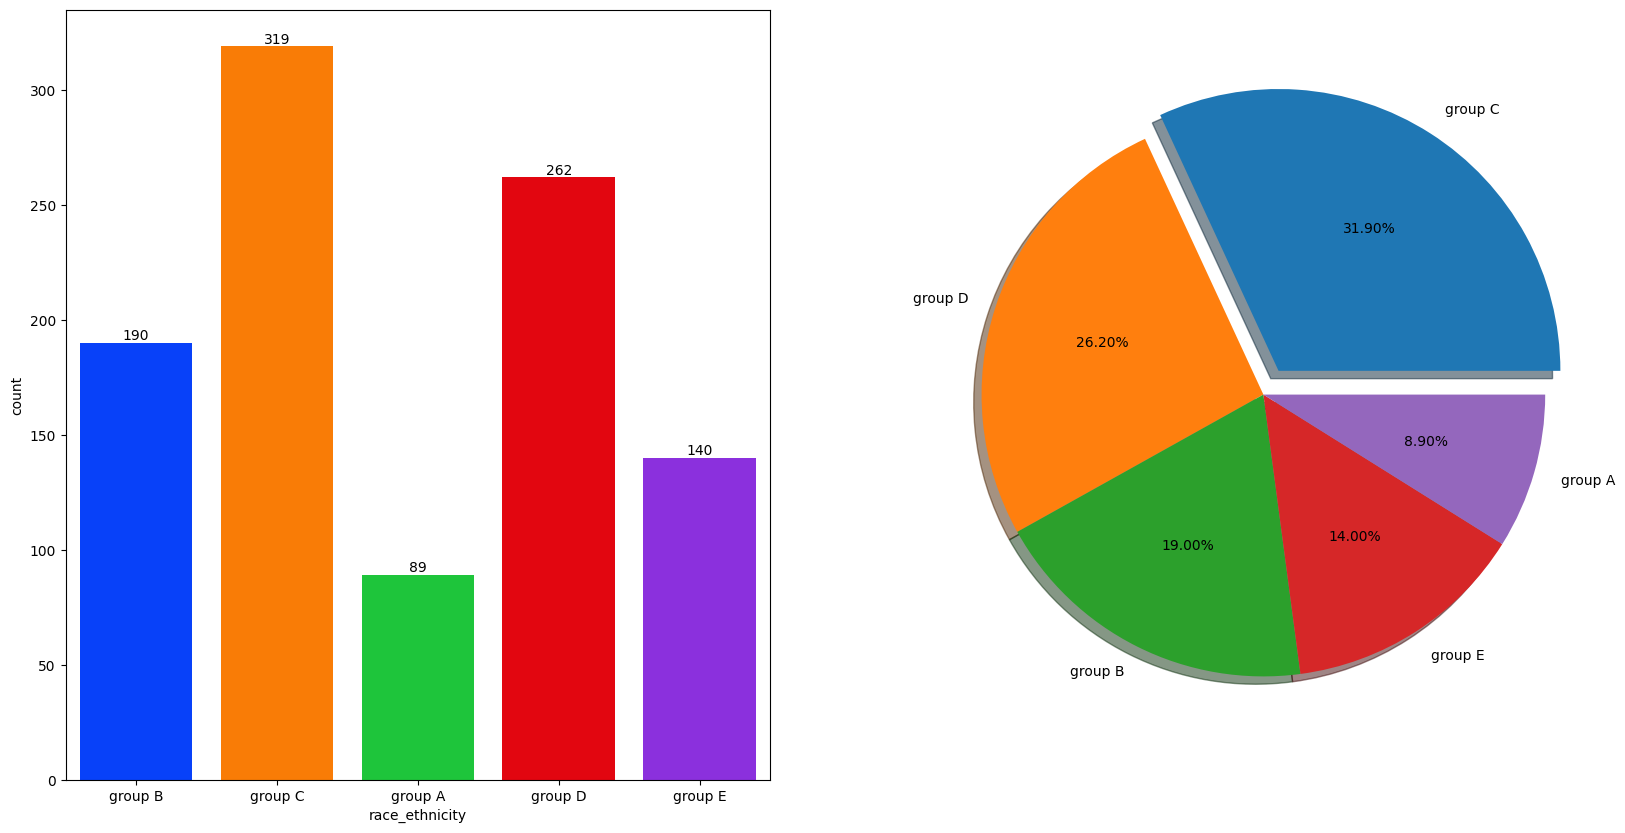

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],palette='bright',ax=ax[0],saturation=0.95)

for i in ax[0].containers:
    ax[0].bar_label(i)

plt.pie(df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%2.2f%%',shadow=True)
plt.show()    

INSIGHT:    
    => Most of the students belonging from group C and group D.    
    =>  Lowest number of students belonging from group A

#### *Bivariate Analysis (is race_ethnicity has any impact on student's performance?)*

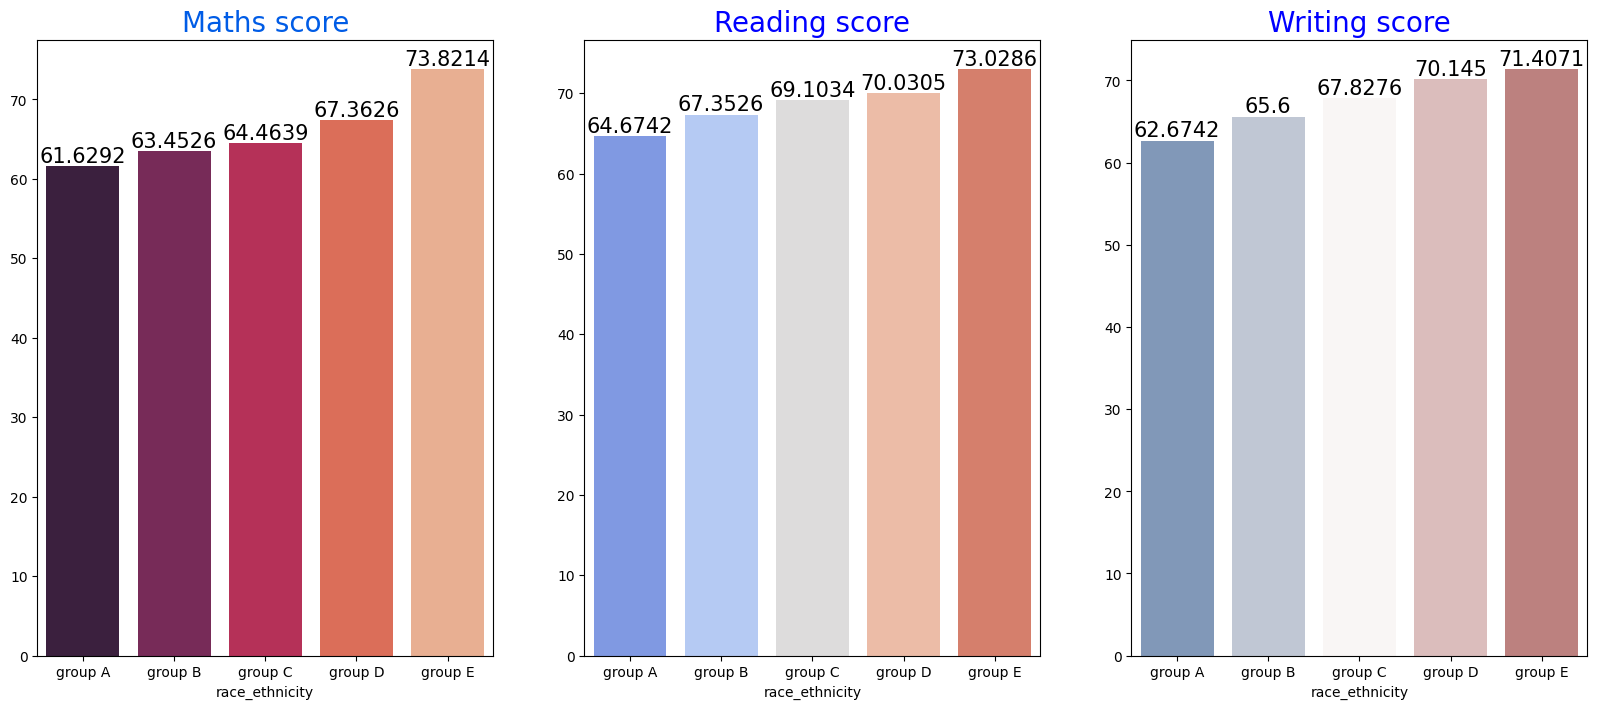

In [108]:
group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=group_data2['math_score'].mean().index,
            y=group_data2['math_score'].mean().values,
            palette='rocket',
            ax=ax[0])
ax[0].set_title('Maths score',color='#005ce6',size=20)      
for i in ax[0].containers:
    ax[0].bar_label(i, color='black', size=15)

sns.barplot(x=group_data2['reading_score'].mean().index,
            y=group_data2['reading_score'].mean().values,
            palette='coolwarm',
            ax=ax[1])
ax[1].set_title('Reading score',color='b', size=20)
for i in ax[1].containers:
    ax[1].bar_label(i,color='black',size=15)


sns.barplot(x=group_data2['writing_score'].mean().index,
            y=group_data2['writing_score'].mean().values,
            palette='vlag',
            ax=ax[2])
ax[2].set_title('Writing score',color='b',size=20)
for i in ax[2].containers:
    ax[2].bar_label(i,color='black',size=15)



INSIGHTS:    
    => Group E students scored the highest marks.    
    => group A students scored the lowest arks.    
    => students from a lower socioeconomic status have a lower average in al  course     subjects.

#### **3) Parental_level_of_education:** 

What is educational backgroud of student's parent?    
is parental education has any impact on student's perormance?

#### *Univariate Analysis:*

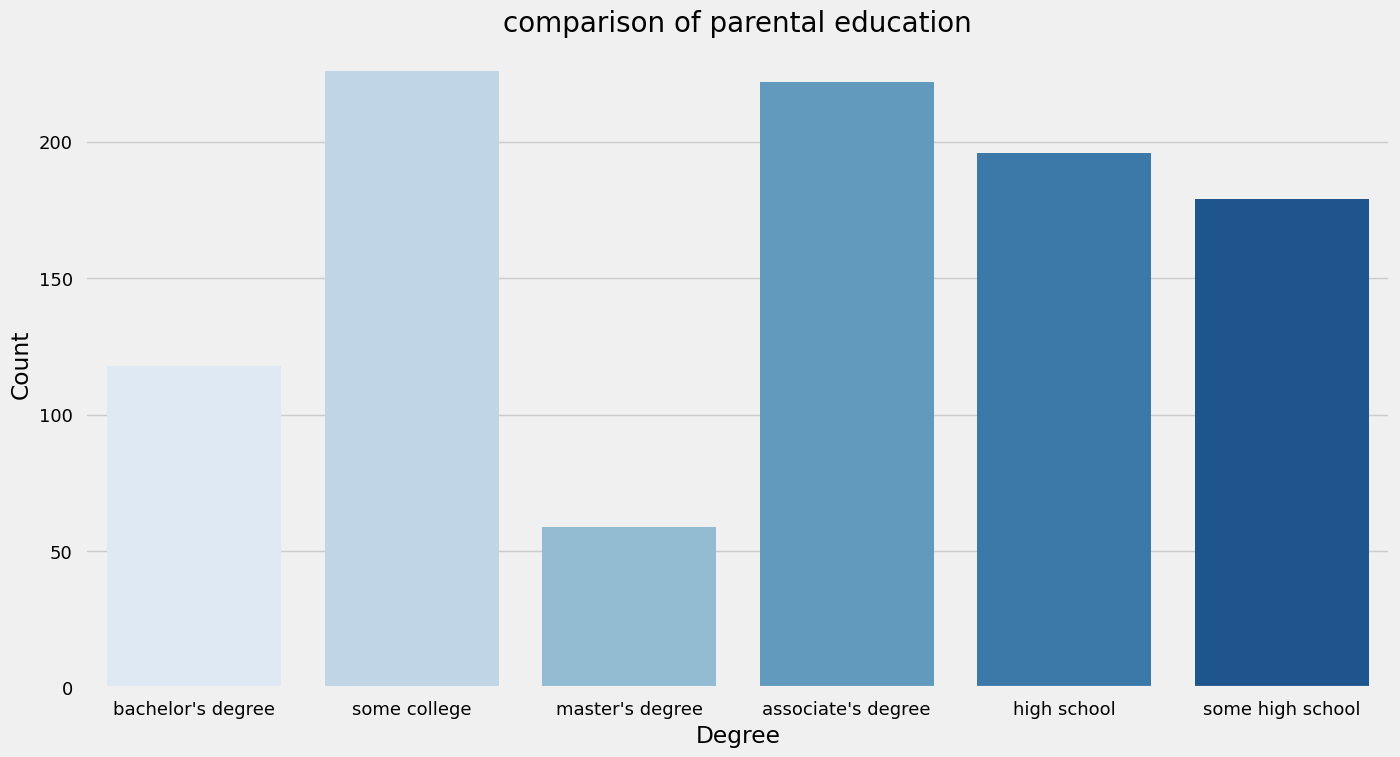

In [43]:
plt.rcParams['figure.figsize']=(15,8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'],palette='Blues')
plt.title('comparison of parental education', fontweight=3, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

INSIGHTS:    
    => Largest number of parents are from 'some college' 

#### *Bivariate Analysis:*


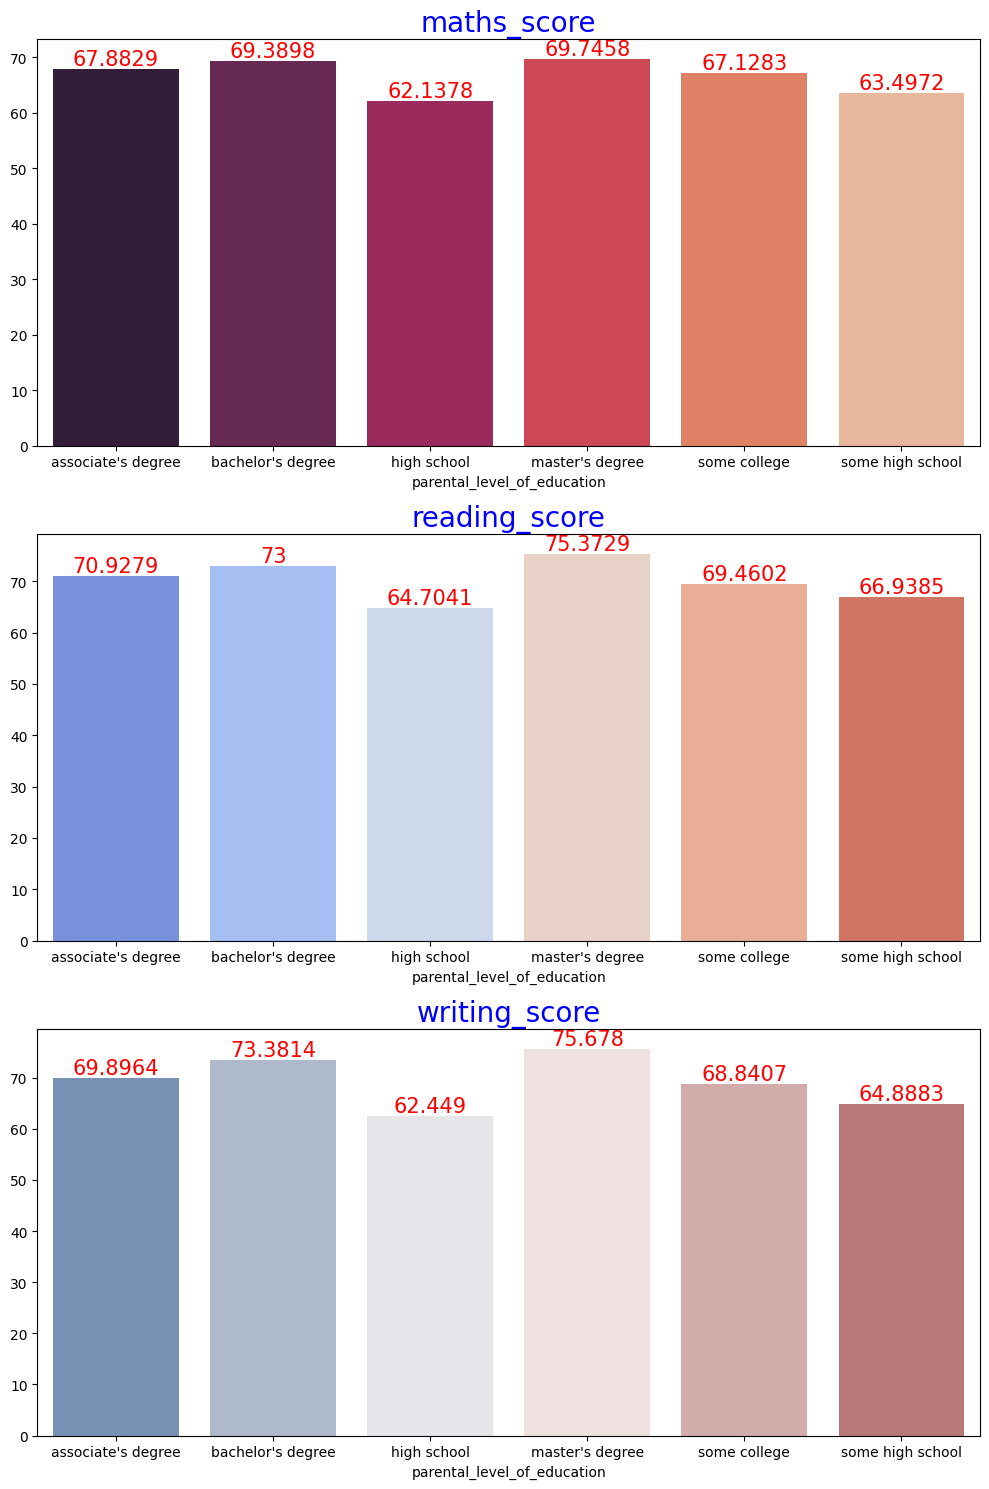

In [11]:
group_data3=df.groupby('parental_level_of_education')
f,ax=plt.subplots(3,1,figsize=(10,15))
sns.barplot(x=group_data3['math_score'].mean().index,
            y=group_data3['math_score'].mean().values,
            palette='rocket',
            ax=ax[0])
ax[0].set_title('maths_score',color='b',size=20)
for i in ax[0].containers:
    ax[0].bar_label(i,color='red',size=15)

sns.barplot(x=group_data3['reading_score'].mean().index,
            y=group_data3['reading_score'].mean().values,
            palette='coolwarm',
            ax=ax[1])
ax[1].set_title('reading_score',color='b',size=20)
for i in ax[1].containers:
    ax[1].bar_label(i,color='r',size=15)

sns.barplot(x=group_data3['writing_score'].mean().index,
            y=group_data3['writing_score'].mean().values,
            palette='vlag',
            ax=ax[2])
ax[2].set_title('writing_score',color='b',size=20)
for i in ax[2].containers:
    ax[2].bar_label(i,color='r',size=15)
plt.tight_layout()
plt.show()

INSIGHTS:    
    => The scores of students whose parents possess master's degree are higher in all the subjects followed by bacherlor's degree.    
    => the scores of the students whose parents' level of education is high school are lower in all subjects.

#### **4) Lunch** 

*1) Univariate Analysis:   (which type of lunch is most common among students? )*

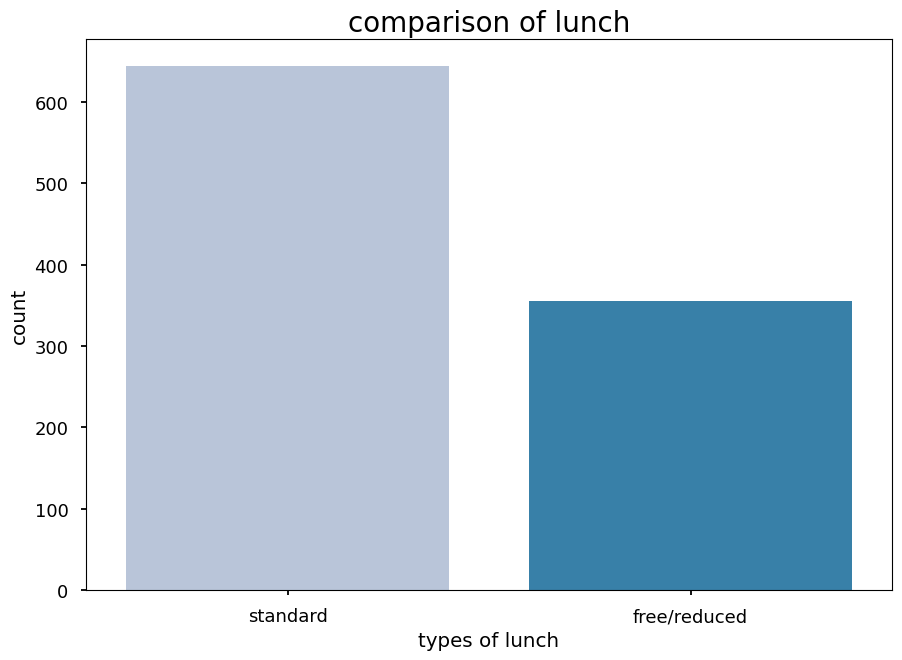

In [40]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],palette='PuBu')
plt.title("comparison of lunch", fontweight=5, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

INSIGHTS:    
        => Students being served standard lunch was more than free lunch.

#### *2) Bivariate Analysis:  (Is lunch type intake has any impact on students performance?)*

Text(0.5, 1.0, 'Lunch vs total_score ')

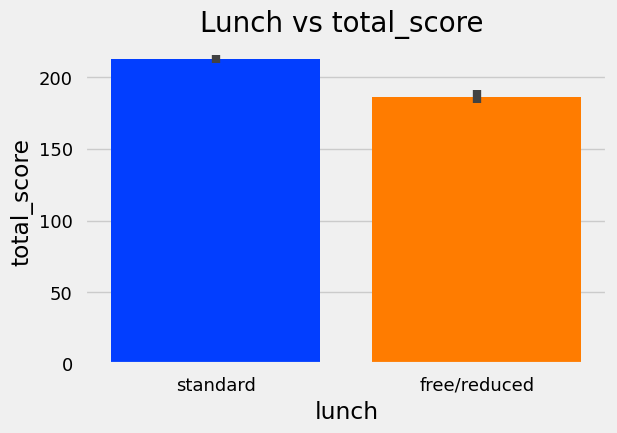

In [75]:
f,ax=plt.subplots(1,1,figsize=(6,4))

sns.barplot(x=df['lunch'],y=df['total_score'],
            palette = 'bright', saturation=10.95,)
plt.title('Lunch vs total_score ',color='black',size=20)
    

INSIGHTS:    
    => Students who got standard lunch tend to perform better than students who got free/reduced lunch. 

#### **5) test_prepartion_course:**

#### *Univariate Analysis: (how is distribution of test_preparation_course?)*

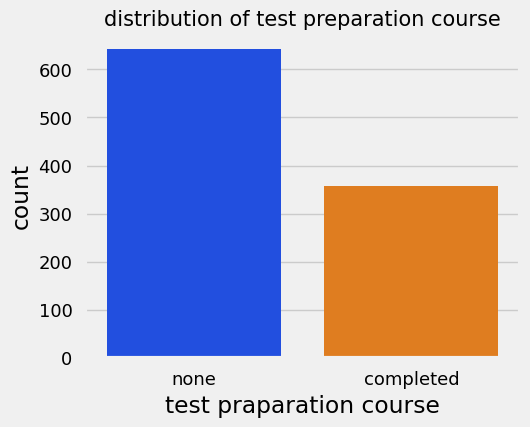

In [87]:
plt.rcParams['figure.figsize']=(5,4)
sns.countplot(x=df['test_preparation_course'], palette='bright')
plt.title("distribution of test preparation course", fontsize=15)
plt.xlabel('test praparation course')
plt.ylabel('count')
plt.show()

#### *Bivariate Analysis: (is test preparation course has any impact on students result?)*

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

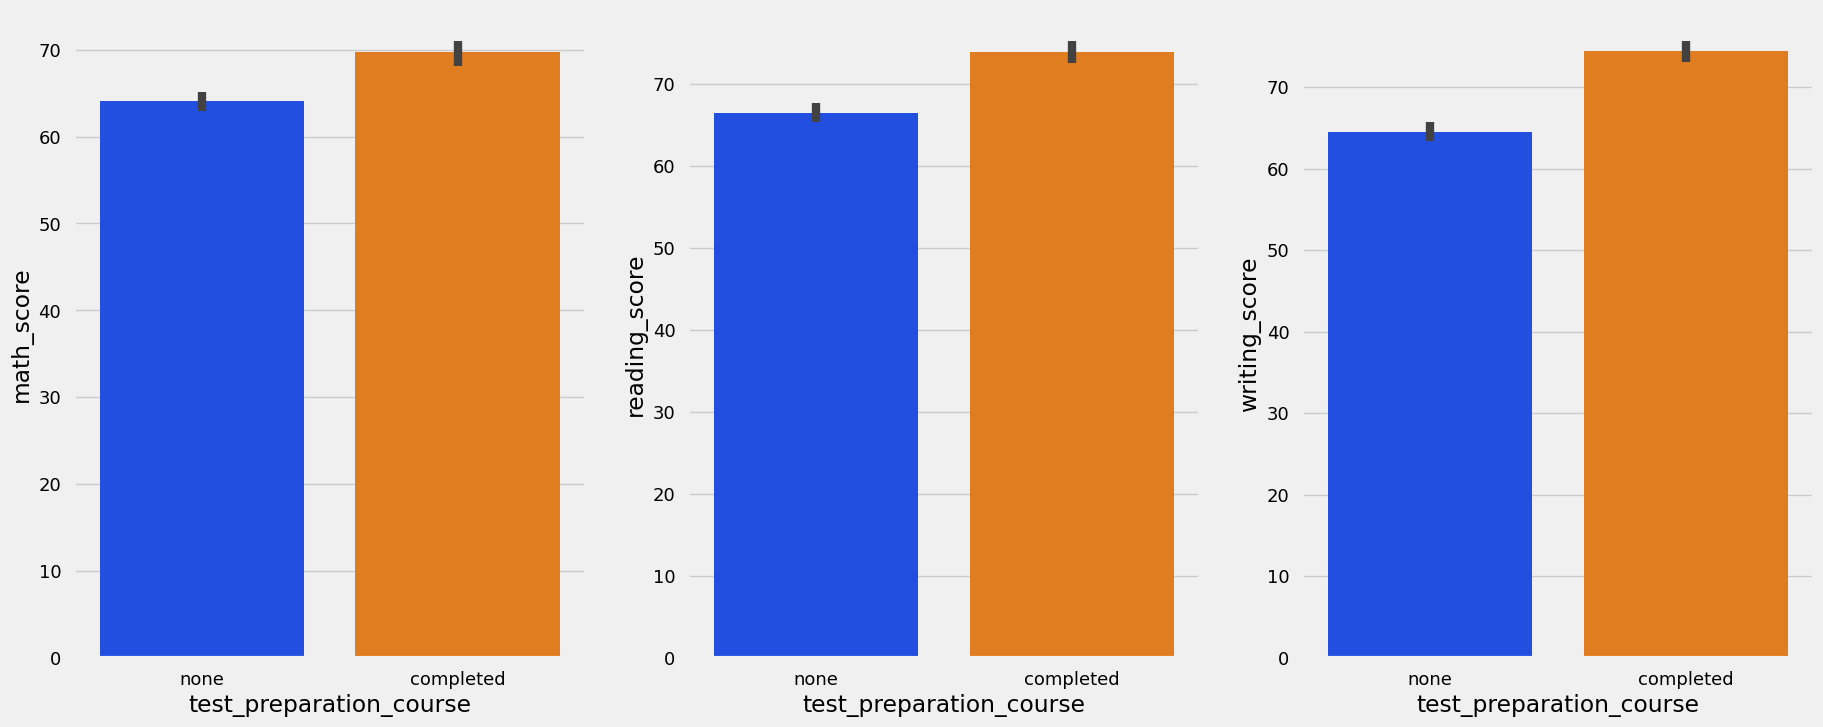

In [101]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], palette='bright')
plt.subplot(1,3,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], palette='bright')
plt.subplot(1,3,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], palette='bright')

INSIGHTS:    
    => Students who have completed the test preparation course have scored higher in all    three categories than those who haven't completed the course.

#### **6) Checking Outliers:**

<Axes: ylabel='average'>

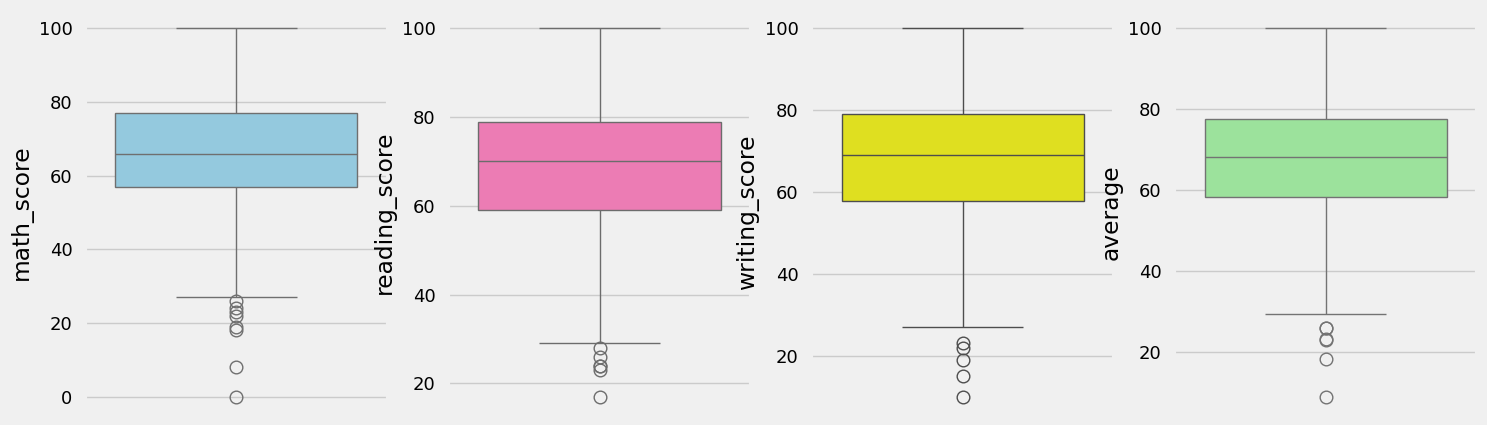

In [105]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'], color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')  

#### **7) Multivariate Analysis using Pairplot:**

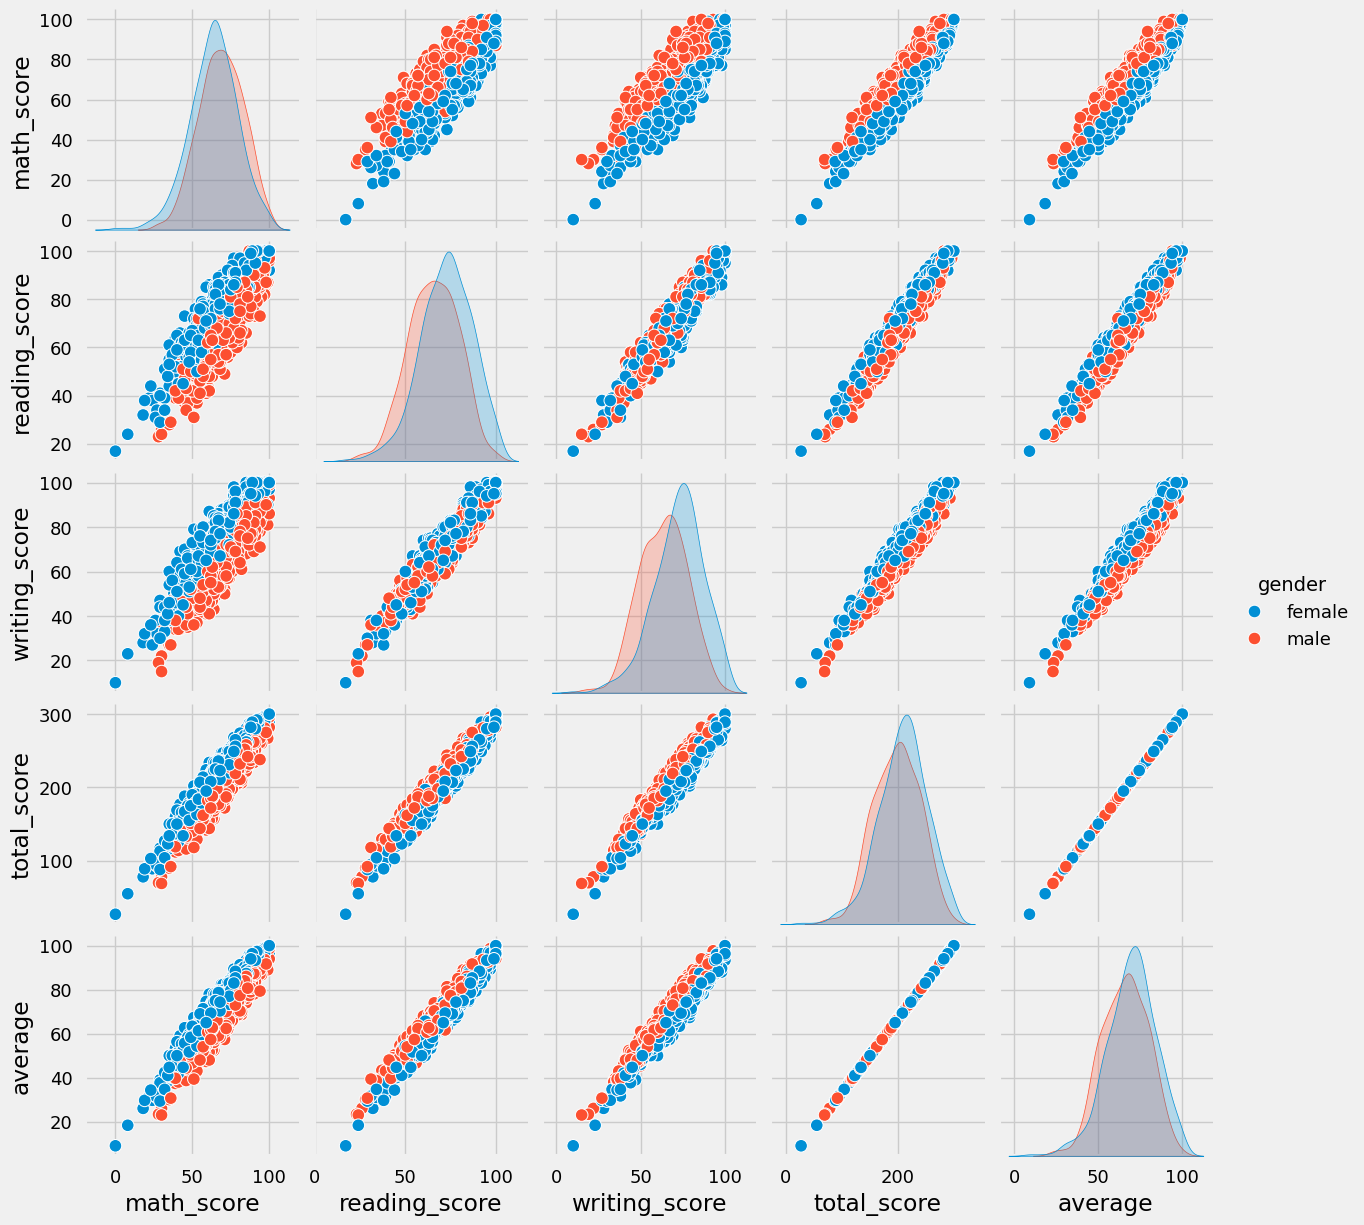

In [109]:
sns.pairplot(df, hue='gender')
plt.show()

INSIGHTS:    
    => From the above plot it is clear that all the scores increase linearly with each other.